In [1]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [2]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 16)

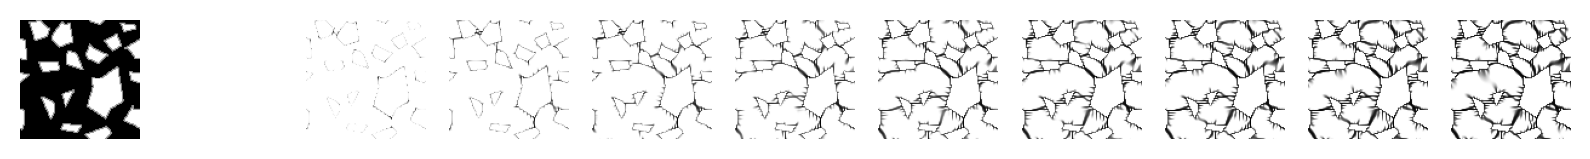

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [10]:
name = 'NN_library/AutoUnet/AutoUnet_norm'
args = {'lr' : 0.0000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [5]:
unet = AutoUNet()

In [6]:
torch.cuda.empty_cache() 

In [7]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [8]:
unet = load_network(unet, args['name']+'_99', args)

In [11]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  801.2892074543
Epoch: 0 batch: 100 mean train loss:  875.1511981790
Epoch: 0 batch: 200 mean train loss:  957.5942725637
Epoch: 0 batch: 300 mean train loss:  1130.8998531457
Epoch: 0 batch: 400 mean train loss:  890.2586679689
Epoch: 0 batch: 500 mean train loss:  1048.9310783464
Epoch: 0 batch: 600 mean train loss:  881.6960771722
Epoch: 0 batch: 700 mean train loss:  768.2166756555
Epoch: 0 mean train loss:  869.7643184123 mean val. rec. loss:  1103.5069580078
Epoch: 1 batch: 0 mean train loss:  905.7059982722
Epoch: 1 batch: 100 mean train loss:  648.6037573386
Epoch: 1 batch: 200 mean train loss:  783.7298676586
Epoch: 1 batch: 300 mean train loss:  605.0455522183
Epoch: 1 batch: 400 mean train loss:  634.9728630157
Epoch: 1 batch: 500 mean train loss:  712.9261719203
Epoch: 1 batch: 600 mean train loss:  1195.3293930581
Epoch: 1 batch: 700 mean train loss:  937.2617541358
Epoch: 1 mean train loss:  863.0402561372 mean val. rec. loss:  1093.4759

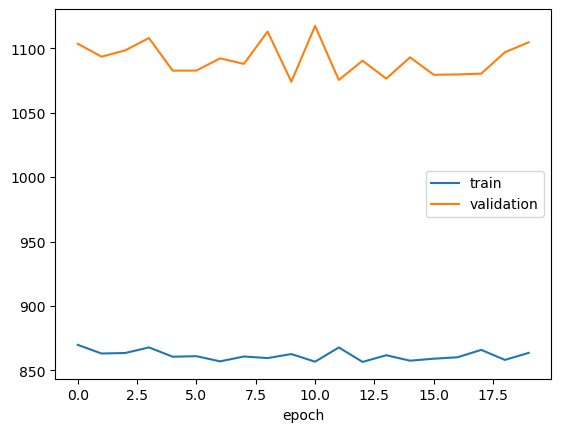

In [12]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## Train with Convnet

In [4]:
from NN_library.ConvNet.ConvNet import *

name = 'NN_library/AutoUnet/AutoUnet_w_Conv_norm'
conv_name = 'NN_library/ConvNet/Conv_w_AutoUnet_norm'

In [5]:
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name, 'conv_name' : conv_name}

In [6]:
unet = AutoUNet()
convnet = ConvNet(16)

In [7]:
convnet = load_network(convnet, 'NN_library/ConvNet/ConvNet_norm', args)

In [8]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_norm', args)  

In [19]:
losses_train, losses_val = train_w_Conv(unet, convnet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.3051186628
Epoch: 0 batch: 100 mean train loss:  0.3561462145
Epoch: 0 batch: 200 mean train loss:  0.2374827056
Epoch: 0 batch: 300 mean train loss:  0.3065282158
Epoch: 0 batch: 400 mean train loss:  0.3064064486
Epoch: 0 batch: 500 mean train loss:  0.2747890120
Epoch: 0 batch: 600 mean train loss:  0.3680934641
Epoch: 0 batch: 700 mean train loss:  0.3044844102
Epoch: 0 mean train loss:  0.3107300728 mean val. rec. loss:  0.2766307890
Epoch: 1 batch: 0 mean train loss:  0.3022626201
Epoch: 1 batch: 100 mean train loss:  0.3656224324
Epoch: 1 batch: 200 mean train loss:  0.2821313082
Epoch: 1 batch: 300 mean train loss:  0.2391514308
Epoch: 1 batch: 400 mean train loss:  0.2904076423
Epoch: 1 batch: 500 mean train loss:  0.3144864538
Epoch: 1 batch: 600 mean train loss:  0.3050743570
Epoch: 1 batch: 700 mean train loss:  0.2489523147
Epoch: 1 mean train loss:  0.3120672074 mean val. rec. loss:  0.2732625604
Epoch: 2 batch: 0 mean train loss:  0.

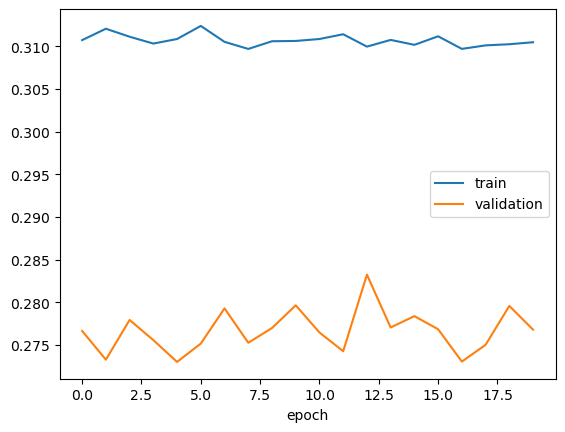

In [23]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])